<a href="https://colab.research.google.com/github/ycv005/Weather_forecast/blob/master/new_nina_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
data = pd.read_csv('nina-3-4.csv')
data = data.set_index('Year')

In [0]:
data.head(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
1953,26.74,27.00,27.57,28.04,28.28,28.12,27.43,26.94,27.01,26.87,26.88,27.00
1954,26.98,27.03,26.90,26.64,27.12,26.80,26.11,25.43,25.12,25.23,25.57,25.26
1955,25.61,25.81,26.22,26.60,26.66,26.55,26.15,25.51,25.28,24.41,24.25,24.57
1956,25.34,25.76,26.46,26.85,27.13,26.81,26.23,25.68,25.73,25.75,25.56,25.71
1957,26.04,26.54,27.46,28.23,28.55,28.36,28.17,27.69,27.44,27.42,27.62,27.90
1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62


In [0]:
data1 = data.transpose()
data1

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
JAN,24.55,25.24,26.67,26.74,26.98,25.61,25.34,26.04,28.33,27.07,26.27,26.23,25.96,25.77,27.34,25.66,27.67,25.88,25.69,27.50,26.83,24.81,25.62,28.34,24.46,26.09,24.54,27.32,27.17,26.41,27.08,26.18,26.67,28.89,25.88,25.38,25.89,27.68,27.45,24.58,26.56,27.03,28.38,26.69,26.64,27.57,25.69,26.01,28.93,24.86,24.78,25.81,26.39,27.15,26.81,27.21,25.63,27.24,24.86,25.66,28.07,25.00,25.67,26.01,26.05,27.05,29.11,26.12,25.57,27.19
FEB,25.06,25.71,26.74,27.00,27.03,25.81,25.76,26.54,28.24,27.18,26.29,26.56,26.19,26.22,27.13,26.19,27.55,26.11,25.68,27.86,26.95,25.18,26.30,27.95,25.10,26.07,25.49,27.13,27.00,26.53,26.97,26.11,26.59,28.69,26.56,26.03,26.05,27.88,27.03,25.28,26.96,27.07,28.53,27.16,26.81,27.49,25.89,26.38,28.78,25.43,25.21,26.12,26.71,27.39,26.98,27.11,26.08,26.88,25.08,25.96,28.01,25.64,26.08,26.24,26.14,27.17,29.01,26.67,25.97,27.46
MAR,25.87,26.90,27.17,27.57,26.90,26.22,26.46,27.46,28.27,27.47,26.98,26.94,26.80,27.18,27.02,26.94,28.21,26.50,26.33,27.82,27.14,25.92,27.09,27.55,25.84,26.19,26.46,27.47,27.09,27.27,27.31,26.64,27.41,28.66,26.77,26.50,26.87,28.27,27.38,26.08,27.33,27.32,28.66,27.67,27.39,27.75,26.67,27.04,28.62,26.33,26.30,26.80,27.29,27.65,27.40,27.73,26.57,27.10,26.07,26.59,28.18,26.36,26.67,27.03,27.00,27.75,28.90,27.32,26.48,28.09
APR,26.28,27.58,27.80,28.04,26.64,26.60,26.85,28.23,28.27,27.88,27.49,27.36,27.13,27.78,26.95,27.38,28.16,26.74,27.10,28.13,27.74,26.63,27.89,27.24,26.46,26.86,26.88,27.44,27.12,27.83,27.75,27.29,28.03,28.77,27.14,26.64,27.49,28.39,27.38,26.74,27.90,28.01,29.02,28.41,28.08,28.10,27.35,27.98,28.60,26.70,26.95,27.33,27.84,27.68,27.89,28.08,27.50,27.50,26.83,27.47,28.20,27.05,27.32,27.57,27.90,28.52,28.72,28.03,27.31,28.44
MAY,26.18,27.92,27.79,28.28,27.12,26.66,27.13,28.55,28.31,27.70,27.68,27.75,27.05,27.63,26.82,27.99,27.55,27.35,27.19,28.29,27.63,26.95,28.32,26.96,26.64,26.80,27.20,27.72,27.20,27.69,28.01,27.36,28.39,28.84,27.20,26.90,27.40,28.56,26.68,27.06,28.02,28.20,28.98,28.71,28.24,27.82,27.55,28.58,28.51,26.79,27.07,27.60,28.24,27.32,28.00,28.24,27.85,27.46,27.09,27.99,27.71,27.41,27.61,27.53,28.25,28.85,28.23,28.30,27.73,28.48
JUN,26.46,27.73,27.18,28.12,26.80,26.55,26.81,28.36,27.99,27.37,27.24,27.67,27.08,27.62,26.59,28.09,27.64,27.47,27.88,27.69,27.04,26.60,28.18,26.55,26.53,26.23,27.35,27.74,27.02,27.43,27.94,27.27,28.26,28.27,26.83,26.81,27.42,28.65,25.99,27.14,27.64,28.25,28.30,28.08,28.04,27.59,27.29,28.82,27.34,26.53,26.94,27.54,28.44,27.44,27.86,27.77,27.73,27.37,27.04,28.04,27.04,27.35,27.75,27.30,27.96,28.90,27.69,28.06,27.77,28.18
JUL,26.29,27.60,26.53,27.43,26.11,26.15,26.23,28.17,27.32,26.44,26.88,26.89,26.76,27.78,26.33,27.90,27.33,26.97,27.58,27.08,26.21,26.13,28.14,25.76,26.39,25.90,27.13,27.38,26.74,26.82,27.23,26.65,27.66,27.18,26.79,26.56,27.18,28.59,25.56,26.72,27.38,28.05,27.51,27.52,27.54,27.08,26.85,28.86,26.30,26.13,26.63,27.25,28.03,27.50,27.78,27.06,27.30,26.71,26.99,27.78,26.22,26.87,27.54,26.91,27.23,28.75,26.82,27.54,27.42,27.64
AUG,25.88,27.02,26.30,26.94,25.43,25.51,25.68,27.69,26.85,26.09,26.70,26.19,26.33,27.48,25.60,27.97,26.48,26.44,27.01,27.02,25.60,25.75,27.95,25.22,26.33,25.33,26.98,26.85,26.07,26.75,26.48,26.33,27.58,26.59,26.61,26.30,27.17,28.42,25.66,26.33,27.07,27.53,26.91,26.99,27.38,26.23,26.64,28.75,25.57,25.63,26.37,26.80,27.72,27.11,27.62,26.80,27.16,26.14,26.72,27.42,25.47,26.21,27.32,26.47,26.82,28.79,26.28,26.70,26.94,26.90
SEP,25.74,27.23,26.36,27.01,25.12,25.28,25.73,27.44,26.40,25.92,26.44,25.78,25.94,27.40,25.32,28.01,26.27,25.86,26.72,27.15,25.65,25.72,27.95,25.06,26.08,25.05,27.02,27.12,26.01,26.99,26.44,26.53,28.21,26.20,26.38,26.02,27.24,28.36,25.72,26.42,26.94,27.

In [0]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data1.columns)*12)
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=840, freq='MS')

In [0]:
data_np = data1.transpose().as_matrix()
shape = data_np.shape
data_np

array([[24.55, 25.06, 25.87, 26.28, 26.18, 26.46, 26.29, 25.88, 25.74,
        25.69, 25.47, 25.29],
       [25.24, 25.71, 26.9 , 27.58, 27.92, 27.73, 27.6 , 27.02, 27.23,
        27.2 , 27.25, 26.91],
       [26.67, 26.74, 27.17, 27.8 , 27.79, 27.18, 26.53, 26.3 , 26.36,
        26.26, 25.92, 26.21],
       [26.74, 27.  , 27.57, 28.04, 28.28, 28.12, 27.43, 26.94, 27.01,
        26.87, 26.88, 27.  ],
       [26.98, 27.03, 26.9 , 26.64, 27.12, 26.8 , 26.11, 25.43, 25.12,
        25.23, 25.57, 25.26],
       [25.61, 25.81, 26.22, 26.6 , 26.66, 26.55, 26.15, 25.51, 25.28,
        24.41, 24.25, 24.57],
       [25.34, 25.76, 26.46, 26.85, 27.13, 26.81, 26.23, 25.68, 25.73,
        25.75, 25.56, 25.71],
       [26.04, 26.54, 27.46, 28.23, 28.55, 28.36, 28.17, 27.69, 27.44,
        27.42, 27.62, 27.9 ],
       [28.33, 28.24, 28.27, 28.27, 28.31, 27.99, 27.32, 26.85, 26.4 ,
        26.45, 26.75, 26.62],
       [27.07, 27.18, 27.47, 27.88, 27.7 , 27.37, 26.44, 26.09, 25.92,
        26.24, 26.04

In [0]:
data_np = data_np.reshape((shape[0] * shape[1], 1))
data_np.shape

(840, 1)

In [0]:
df = pd.DataFrame({'Mean' : data_np[:,0]})
df.set_index(dates, inplace = True)
df.head()

,Mean
1950-01-01,24.55
1950-02-01,25.06
1950-03-01,25.87
1950-04-01,26.28
1950-05-01,26.18


Text(0, 0.5, 'Mean across Month')

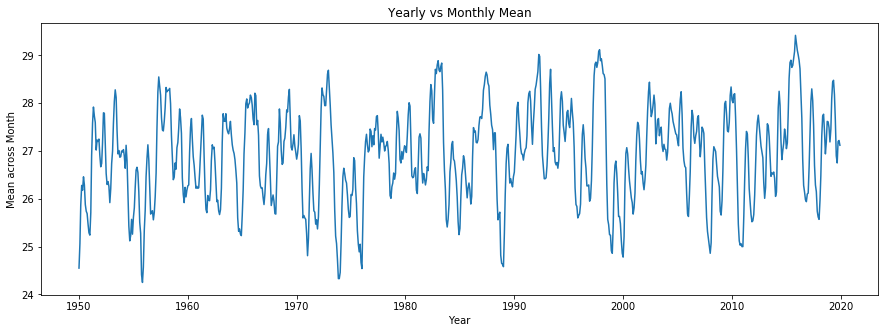

In [0]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [0]:
dataset = df.values
dataset.shape

(840, 1)

In [0]:
train = dataset[0:720,:]
test = dataset[720:,:]

In [0]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (840, 1)
Train shape: (720, 1)
Test shape: (120, 1)


In [0]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(840, 1)

In [0]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#x_train shape
x_train.shape

(660, 60)

In [0]:
#y_train shape
y_train.shape

(660,)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(660, 60, 1)

In [0]:
 # Creating and fitting the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 40s - loss: 0.0260
Epoch 2/10
 - 39s - loss: 0.0094
Epoch 3/10
 - 40s - loss: 0.0049
Epoch 4/10
 - 40s - loss: 0.0039
Epoch 5/10
 - 40s - loss: 0.0037
Epoch 6/10
 - 40s - loss: 0.0037
Epoch 7/10
 - 40s - loss: 0.0034
Epoch 8/10
 - 39s - loss: 0.0034
Epoch 9/10
 - 40s - loss: 0.0034
Epoch 10/10
 - 40s - loss: 0.0033


In [0]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [0]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

In [0]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

0.2842595800734615

Text(0.5, 1.0, 'Forecasting on Actual data')

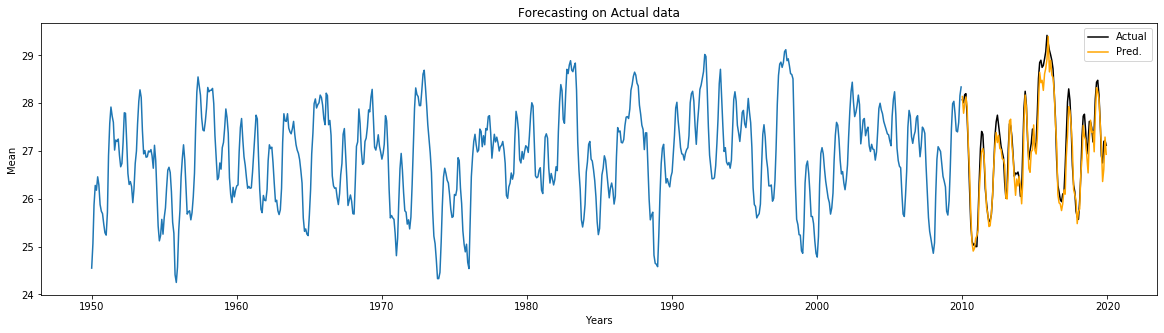

In [0]:
train = df[:720]
test = df[720:]
test['Predictions'] = Mean1

plt.figure(figsize=(20,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], label = 'Actual', color = 'black')
plt.plot(test['Predictions'], label = 'Pred.', color = 'orange')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')